In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation

In [3]:
aveEmotions = pd.read_csv("aveEmotion.csv");

In [5]:
# print(aveEmotions)
aveEmotions.head(10)

,ID,Moved,Fascinated,Funny,Surprised,Indifferent,Calm,Unsettled,Personal,Curious
0,1001,-0.141070,0.74282,-0.829100,0.114420,-0.21236,0.313680,-0.47097,0.143760,0.338840
1,1002,-0.225820,0.23785,-0.022247,0.082065,0.16403,0.646690,-0.60968,-0.213770,-0.059109
2,1003,0.002834,0.44047,-0.869410,0.048535,-0.10546,0.591430,-0.46635,0.244830,0.113120
3,1004,0.469020,0.50615,-0.965970,-0.254480,-0.42721,1.121600,-0.77288,0.054223,0.269500
4,1005,-0.801470,0.49610,0.326050,0.237830,0.14185,0.033303,-0.11804,-0.681290,0.365660
5,1006,-0.257770,0.29422,-0.488710,0.042017,0.65161,0.414210,-0.18297,-0.494200,0.021600
6,1007,0.164830,0.58449,-0.959410,0.182500,-0.37999,0.876280,-0.75691,0.123170,0.165040
7,1008,-0.033978,0.63842,-0.781480,0.086446,0.44838,0.271120,-0.23298,-0.495670,0.099748
8,1009,0.004992,0.73277,-0.743760,-0.008288,-0.86954,0.553040,-0.30165,0.110040,0.522400
9,1010,0.254780,0.90964,-0.763770,-0.090928,-0.43831,0.192880,-0.76366,0.323900,0.375470


In [14]:
#X, labels_true = make_blobs(n_samples=300) ## this generates a dataset to work with

In [17]:
X = aveEmotions.to_numpy()
X = np.delete(X, 0, axis=1) 
X

array([[-1.4107e-01,  7.4282e-01, -8.2910e-01,  1.1442e-01, -2.1236e-01,
         3.1368e-01, -4.7097e-01,  1.4376e-01,  3.3884e-01],
       [-2.2582e-01,  2.3785e-01, -2.2247e-02,  8.2065e-02,  1.6403e-01,
         6.4669e-01, -6.0968e-01, -2.1377e-01, -5.9109e-02],
       [ 2.8340e-03,  4.4047e-01, -8.6941e-01,  4.8535e-02, -1.0546e-01,
         5.9143e-01, -4.6635e-01,  2.4483e-01,  1.1312e-01],
       [ 4.6902e-01,  5.0615e-01, -9.6597e-01, -2.5448e-01, -4.2721e-01,
         1.1216e+00, -7.7288e-01,  5.4223e-02,  2.6950e-01],
       [-8.0147e-01,  4.9610e-01,  3.2605e-01,  2.3783e-01,  1.4185e-01,
         3.3303e-02, -1.1804e-01, -6.8129e-01,  3.6566e-01],
       [-2.5777e-01,  2.9422e-01, -4.8871e-01,  4.2017e-02,  6.5161e-01,
         4.1421e-01, -1.8297e-01, -4.9420e-01,  2.1600e-02],
       [ 1.6483e-01,  5.8449e-01, -9.5941e-01,  1.8250e-01, -3.7999e-01,
         8.7628e-01, -7.5691e-01,  1.2317e-01,  1.6504e-01],
       [-3.3978e-02,  6.3842e-01, -7.8148e-01,  8.6446e-02,  4

In [18]:
af = AffinityPropagation()#preference=-50)
# clustering = af.fit(aveEmotions)
clustering = af.fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [19]:
print(cluster_centers_indices)
print(labels)
print(n_clusters_)

[ 16  22  30  33  41  50  57  64  70  72  83  91 107]
[10  2  9  7  0  5  9  8  6  9  5  7 11  1  1 12  0  0  9  0  8  5  1  8
  3  8 12  1  2 11  2  2  3  3  2 12 10  0  8  0  2  4  2  2 12  5  8  5
  5  5  5  4  8  0  5  8 10  6  7  7  1 10  9  5  7  5  8  9  1 10  8  7
  9  6  5 12  4  9  6  6  5  7  7 10 10 12  9 12  8  2 10 11 10  9  7  9
  6  6  7  7  2  7  9  9  7  9 10 12  6]
13


## plotting

In [11]:
# cluster_centers_indices[0]

0

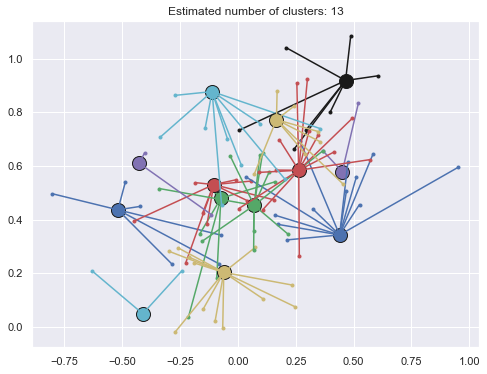

In [20]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(figsize=(8, 6))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## todo dimensional reduction for 2d plotting

- t-SNE (scikit-learn)
- multidimensional scaling (MDS)
